# Lection 4


* <b>Хранимые процедуры</b>
* <b>Функции</b>
* <b>Управляющие инструкции SQL</b>
* <b>Триггеры</b>
* <b>Курсоры</b>


<h3>Хранимые процедуры и Функции</h3>

Функции и хранимые процедуры в SQL, как и в любом другом языке программирования, обеспечивают возможность повторного использования и гибкость. Функции и хранимые процедуры представляют собой блок кода или запросов, хранящихся в базе данных, которые можно использовать снова и снова. Вместо того чтобы писать одни и те же запросы, удобнее сгруппировать все запросы и сохранить их, чтобы можно было использовать их много раз. Что касается гибкости, то всякий раз, когда происходит изменение логики запросов, можно передавать новый параметр функциям и хранимым процедурам.

Отличия хранимой процедуры от функции:

*Хранимая процедура*:

* Хранимая процедура не имеет возвращаемого типа, но имеет выходные аргументы.

* Использование DML-запросов (insert, update, delete) возможно в хранимой процедуре.

* Хранимая процедура имеет и входные, и выходные аргументы.

* Использование или же управление транзакциями возможно в хранимой процедуре.

* Вызов хранимой процедуры из SELECT запросов невозможно.

*Функция*:

* Функция имеет возвращаемый тип и возвращает значение.

* Использование DML (insert, update, delete) запросов внутри функции невозможно. В функциях разрешены только SELECT-запросы.

* Функция не имеет выходных аргументов.

* Вызов хранимой процедуры из функции невозможно.

* Вызов функции внутри SELECT запросов возможен.

Илюстрация создания функции.

Оператор:

* create [or replace] function имя_функции — создает или заменяет функцию, если она существует, с заданным именем и параметрами;

* returns return_type — тип данных, который возвращает функция;

* язык plpgsql — указывает на процедурное расширение PostgreSQL;
внутри знака $ является телом функции;

* declare — показывает, как объявляются или инициализируются переменные;
блок кода [begin — end] — содержит всю логику функции;

* begin — указывает на начало запросов;

* end — указывает конец функции.

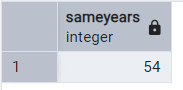

Создание хранимой процедуры,почти такое же, как создание функции с небольшим отличием — в ней нет return.

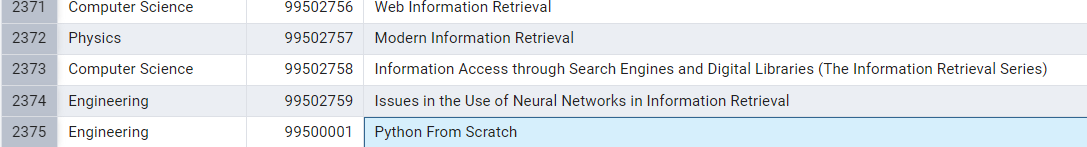

<h2>Управляющие инструкции SQL</h2>

В PL/SQL имеется три категории операторов управления: операторы условного выбора, операторы цикла и операторы последовательного управления.

Категории операторов управления PL/SQL:

* Операторы условного выбора, которые запускают разные операторы для разных значений данных.

* Операторы условного выбора — это IF и CASE.

* Операторы цикла, которые запускают одни и те же операторы с серией разных значений данных.

* Операторы цикла — это базовые LOOP, FOR LOOP и WHILE LOOP.

* Оператор EXIT передает управление в конец цикла. Оператор CONTINUE выходит из текущей итерации цикла и передает управление следующей итерации. Как EXIT, так и CONTINUE имеют необязательное предложение WHEN, в котором можно указать условие.

* Последовательные операторы управления, которые не имеют решающего значения для программирования PL/SQL.

* Последовательные операторы управления — это GOTO, который переходит к указанному оператору, и NULL, который ничего не делает.

Операторы условного выбора IF и CASE запускают разные операторы для разных значений данных.

Оператор IF запускает или пропускает последовательность из одного или нескольких операторов в зависимости от условия. Оператор IF имеет следующие формы:

* IF THEN

* IF THEN ELSE

* IF THEN ELSIF

Оператор CASE выбирает из последовательности условий и запускает соответствующий оператор. Оператор CASE имеет следующие формы:

* Простой оператор CASE, который оценивает одно выражение и сравнивает его с несколькими потенциальными значениями.

* Искомый оператор CASE, который оценивает несколько условий и выбирает первое из них, которое является истинным.

Оператор CASE подходит, когда для каждой альтернативы необходимо выполнить разные действия.

<b> IF THEN </b>


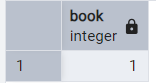

<b>CASE</b>

Селектор — это выражение (обычно одна переменная). Каждое selector_value может быть либо литералом, либо выражением. (Полный синтаксис см. в разделе «Оператор CASE».)

Простой оператор CASE запускает первые операторы, для которых selector_value равно selector. Остальные условия не оцениваются. Если ни один selector_value не равен selector, оператор CASE запускает else_statements, если они существуют, и в противном случае вызывает предопределенное исключение CASE_NOT_FOUND.

-- Пример на CASE. В данном примере мы категоризируем возраст книги.

CREATE OR REPLACE FUNCTION rateYears(checkYear int)
    RETURNS varchar
    LANGUAGE plpgsql
AS
$$
DECLARE
    rate varchar;
BEGIN
    CASE 
        WHEN checkYear > 2020 OR checkYear = 2020 THEN rate := 'New one';
        WHEN checkYear < 2020 AND (checkYear > 2007 OR checkYear = 2007)THEN rate := 'Not new not old';
        WHEN checkYear < 2007 AND (checkYear > 1990 OR checkYear = 1990) THEN rate := 'Old one';
        ELSE rate:= 'Too old';
    END CASE;
	RETURN rate;
END;
$$;


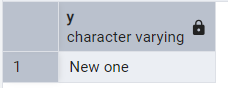

<b>LOOP, FOR </b>

Операторы цикла выполняют одни и те же операторы итеративно с серией различных значений.

Оператор LOOP состоит из трех частей:

* Итеранд, также известный как переменная цикла, для передачи значений из заголовка цикла в тело цикла

* Управление итерацией для генерации значений для цикла

* Тело цикла, выполняемое один раз для каждого значения

Операторы цикла:

* Базовый LOOP

* FOR LOOP

* Курсор FOR LOOP

* WHILE LOOP

Операторы, которые выходят из цикла:

* EXIT

* EXIT WHEN

Операторы, которые выходят из текущей итерации цикла:

* CONTINUE

* CONTINUE WHEN

EXIT, EXIT WHEN, CONTINUE и CONTINUE WHEN могут появляться в любом месте внутри цикла, но не за его пределами. Oracle рекомендует использовать эти операторы вместо оператора GOTO, который может выйти из цикла или текущей итерации цикла, передав управление оператору за пределами цикла.

Вызванное исключение также выходит из цикла.

Операторы LOOP могут быть помечены, и операторы LOOP могут быть вложенными. Метки рекомендуются для вложенных циклов для улучшения читаемости. Необходимо убедиться, что метка в операторе END LOOP совпадает с меткой в ​​начале того же оператора цикла (компилятор не проверяет).

<b>LOOP</b>

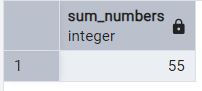

<b>FOR LOOP </b>

Оператор FOR LOOP запускает один или несколько операторов для каждого значения индекса цикла.

Заголовок FOR LOOP определяет итератор. Итератор определяет итеран и элементы управления итерацией. Элемент управления итерацией предоставляет итеранду последовательность значений для доступа в теле цикла. Тело цикла содержит операторы, которые выполняются один раз для каждого значения итеранда.

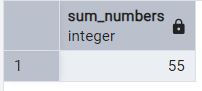

<h2>Тригерры</h2>

Триггер — это указание, согласно которому PostgreSQL должен автоматически вызывать определенную функцию при каждом выполнении операции указанного типа. Триггеры можно прикреплять к таблицам, представлениям и внешним таблицам.

Для таблиц и внешних таблиц можно определить триггеры, которые будут выполняться до или после любой операции INSERT, UPDATE или DELETE, либо один раз для каждой измененной строки, либо один раз для каждого оператора SQL. Триггеры UPDATE также могут быть сконфигурированы таким образом, чтобы срабатывать только в том случае, если определенные столбцы упомянуты в выражении SET оператора UPDATE. Триггеры также могут срабатывать для операторов TRUNCATE.

<b>Триггеры уровня строки и уровня оператора</b>

PostgreSQL позволяет создавать триггеры для каждой строки или для каждого оператора. При использовании триггера для каждой строки PostgreSQL вызывает триггерную функцию один раз для строки, которую обрабатывает оператор, запускающий триггер.

PostgreSQL вызывает триггер для каждого оператора только один раз, когда выполняется соответствующий оператор, независимо от количества строк, которые обрабатывает этот оператор. Если оператор изменяет ноль строк, он также вызывает срабатывание триггера.

Эти два типа триггеров называются триггерами уровня строки и триггерами уровня оператора соответственно.

Триггеры для оператора TRUNCATE можно определить только на уровне оператора, а не на уровне строки.

<b>Триггеры BEFORE, AFTER и INSTEAD OF</b>

Триггеры также классифицируются в зависимости от того, срабатывают ли они до, после или вместо операции. Триггеры BEFORE на уровне оператора срабатывают до того, как оператор начнет что-либо делать, триггеры AFTER на уровне оператора срабатывают в конце оператора. Эти типы триггеров могут быть определены для таблиц, представлений или внешних таблиц.

Триггеры BEFORE на уровне строки срабатывают перед обработкой конкретной строки, триггеры AFTER на уровне строки срабатывают в конце оператора, но до срабатывания любого триггера AFTER на уровне оператора. Эти типы триггеров не рекомендуется использовать с представлениями.

Триггеры INSTEAD OF можно определять только в представлениях и только на уровне строк. Они срабатывают, как только строка представления определяется как подлежащая обработке.

Обычно триггеры BEFORE на уровне строки используются для проверки или изменения данных, которые будут вставлены или обновлены. Например, триггер BEFORE можно использовать для вставки текущего времени в столбец типа timestamp или для проверки согласованности двух элементов строки. Триггеры AFTER на уровне строк эффективны для каскадного обновления других таблиц или проверки соответствия внесенных изменений данным в других таблицах.

Триггер AFTER может получить доступ к конечному значению строки, а триггер BEFORE — нет, поскольку могут существовать другие триггеры BEFORE, которые сработают позже. Если нет особых причин для выбора между триггерами BEFORE или AFTER, триггер BEFORE предпочтительнее, поскольку он не требует, чтобы информация об операции сохранялась до конца оператора.



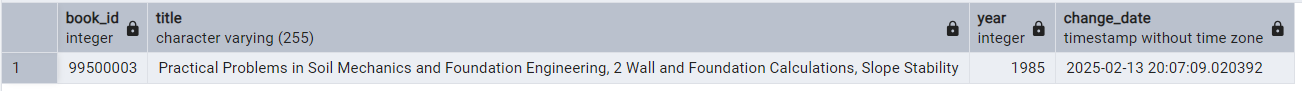

<h2>Курсоры</h2>

Курсоры в PL/pgSQL — это мощный инструмент для работы с результатами SQL-запросов, особенно когда требуется обрабатывать данные построчно. Они позволяют перебирать строки результата запроса, не загружая все данные в память сразу, что особенно полезно при работе с большими объемами данных.

Курсор — это объект, который представляет результат SQL-запроса и позволяет перемещаться по строкам этого результата. В PL/pgSQL курсоры используются для:

* Построчной обработки данных.

* Управления большими наборами данных.

* Выполнения сложной логики, которая требует последовательного доступа к строкам.



Курсор объявляется с помощью команды DECLARE. Синтаксис:

* имя_курсора — уникальное имя курсора.

* SCROLL — позволяет двигаться по курсору в обоих направлениях (вперед и назад).

* NO SCROLL — курсор может двигаться только вперед (по умолчанию).

* запрос — SQL-запрос, результат которого будет обрабатываться курсором.

После объявления курсор нужно открыть с помощью команды OPEN. Это выполняет SQL-запрос и подготавливает данные для обработки.

Для получения данных из курсора используется команда FETCH. Она позволяет извлекать строки по одной и сохранять их в переменные.

* NEXT — следующая строка (по умолчанию).

* PRIOR — предыдущая строка.

* FIRST — первая строка.

* LAST — последняя строка.

* ABSOLUTE n — строка с номером n.

* RELATIVE n — строка на n позиций вперед или назад.

После завершения работы с курсором его нужно закрыть, чтобы освободить ресурсы. Это делается с помощью команды CLOSE.




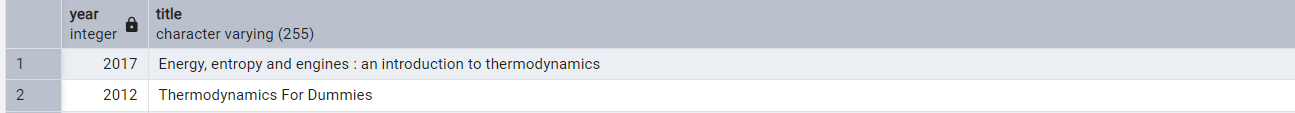

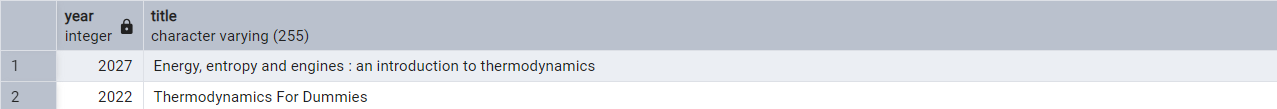